In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
from PIL import Image
from our_mpeg import load

In [4]:
example = load("/home/flamerokz/lfv-compression/data/spaceship.zip")

In [5]:
im1 = example[0,0,0,:,:]
im2 = example[1,0,0,:,:]

In [6]:
Image.fromarray(im1 - im2)

<PIL.Image.Image image mode=RGB size=160x120 at 0x7FE00EF33400>

In [7]:
from our_mpeg import break_blocks, merge_blocks

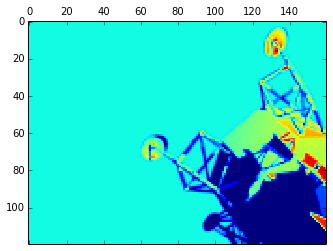

In [8]:
plt.matshow(im1[:,:,0])

0.0


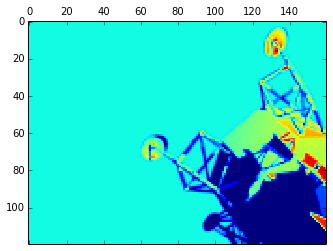

In [9]:
bb = break_blocks(im1)
im1_recovered = merge_blocks(bb)
plt.matshow(im1_recovered[:,:,0])
print(np.linalg.norm(im1_recovered - im1))

In [10]:
from our_mpeg import compute_reference, apply_reference
from our_mpeg import transform, inverse_transform
from our_mpeg import quantize, dequantize
from our_mpeg import zigzag, inverse_zigzag

In [11]:
im1_blocks = break_blocks(im1)
im1_offsets, im1_residuals = compute_reference(im1_blocks, im2)
im1_residuals_dct = transform(im1_residuals)
im1_residuals_q = quantize(im1_residuals_dct)
im1_residuals_q_zig = zigzag(im1_residuals_q)

In [12]:
im1_residuals_q_dzig = inverse_zigzag(im1_residuals_q_zig)
im1_residuals_dq = dequantize(im1_residuals_q_dzig)
im1_residuals_idct = inverse_transform(im1_residuals_dq)
im1_blocks_recovered = apply_reference(im1_offsets, im1_residuals_idct, im2)
im1_recovered = merge_blocks(im1_blocks_recovered)

In [13]:
from PIL import Image
from matplotlib.pyplot import imshow

580.52


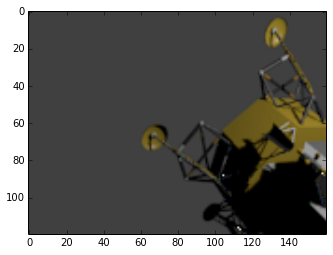

In [14]:
print(np.linalg.norm(im1_recovered.astype(np.float32) - im1.astype(np.float32)))
imshow(Image.fromarray(im1_recovered, "YCbCr").convert("RGB"))


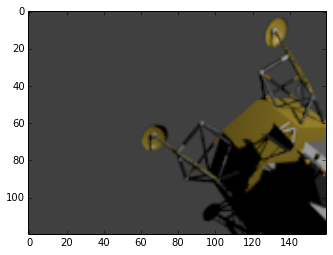

In [15]:
imshow(Image.fromarray(im1,"YCbCr").convert("RGB"))